# Setting up the notebook

<a href="https://colab.research.google.com/github/jkoks-svg/ML_Project_ENSAE/blob/main/ML_Project_ENSAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!pwd
!ls /content/drive/MyDrive/dropoutdata.csv

Preprocessing Libraries

In [ ]:
!pip install doubleml
!pip install xgboost
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import doubleml as dml

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

# Set notebook styling for better visuals

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset

In [ ]:
df=pd.read_csv("/Users/jakob/Documents/Parforceleistung/Studium/MSc Economics/Semester 4/Machine Learning for Econometrics/Project/data.csv", sep=";")
#df=pd.read_csv("/content/drive/MyDrive/dropoutdata.csv", sep=";")

# Display the first few rows of the dataset to get an overview

In [ ]:
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother_qual,Father_qual,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Mother_educ,Father_educ
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0,0


# Description of key variables in the dataset

In [ ]:
print("Dataset Description:")
dataset_description = {
    "Target": "Student status: Graduate, Dropout, or Enrolled",
    "Course": "Study program the student is enrolled in",
    "Age at enrollment": "Age of the student at the time of enrollment",
    "Gender": "Binary indicator (0 = Male, 1 = Female)",
    "Scholarship holder": "Binary indicator for receiving a scholarship (0 = No, 1 = Yes)",
    "Tuition fees up to date": "Indicator if tuition fees are paid (0 = No, 1 = Yes)",
    "Debtor": "Indicator if the student has outstanding debts (0 = No, 1 = Yes)",
    "Admission grade": "Grade obtained at admission",
    "Previous qualification": "Previous academic qualification of the student",
    "Previous qualification grade": "Grade obtained in the previous qualification",
    "Displaced": "Indicator if the student is displaced (0 = No, 1 = Yes)",
    "Educational special needs": "Indicator for special education needs (0 = No, 1 = Yes)",
    "International": "Indicator if the student is international (0 = No, 1 = Yes)",
    "Mother's qualification": "Educational qualification of the student's mother",
    "Father's qualification": "Educational qualification of the student's father",
    "Mother's occupation": "Occupation of the student's mother",
    "Father's occupation": "Occupation of the student's father",
    "Unemployment rate": "Unemployment rate in the country during enrollment",
    "GDP growth rate": "GDP growth rate at the time of enrollment",
    "Inflation rate": "Inflation rate at the time of enrollment"
}
for var, desc in dataset_description.items():
    print(f"{var}: {desc}")

Dataset Description:
Target: Student status: Graduate, Dropout, or Enrolled
Course: Study program the student is enrolled in
Age at enrollment: Age of the student at the time of enrollment
Gender: Binary indicator (0 = Male, 1 = Female)
Scholarship holder: Binary indicator for receiving a scholarship (0 = No, 1 = Yes)
Tuition fees up to date: Indicator if tuition fees are paid (0 = No, 1 = Yes)
Debtor: Indicator if the student has outstanding debts (0 = No, 1 = Yes)
Admission grade: Grade obtained at admission
Previous qualification: Previous academic qualification of the student
Previous qualification grade: Grade obtained in the previous qualification
Displaced: Indicator if the student is displaced (0 = No, 1 = Yes)
Educational special needs: Indicator for special education needs (0 = No, 1 = Yes)
International: Indicator if the student is international (0 = No, 1 = Yes)
Mother's qualification: Educational qualification of the student's mother
Father's qualification: Educational qua

# Check for missing values in the dataset

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


The data consists of 4424 observations and is supported by program SATDAP - Capacitação da Administração Pública under grant POCI-05-5762-FSE-000191, Portugal. We use Target as our outcome variable, **Y**, in our analysis.

# Visualization of the target variable distribution

/var/folders/2t/48g1hgqx30s07cfsvjg95f4w0000gn/T/ipykernel_21124/759501499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Target", data=df, palette="pastel")


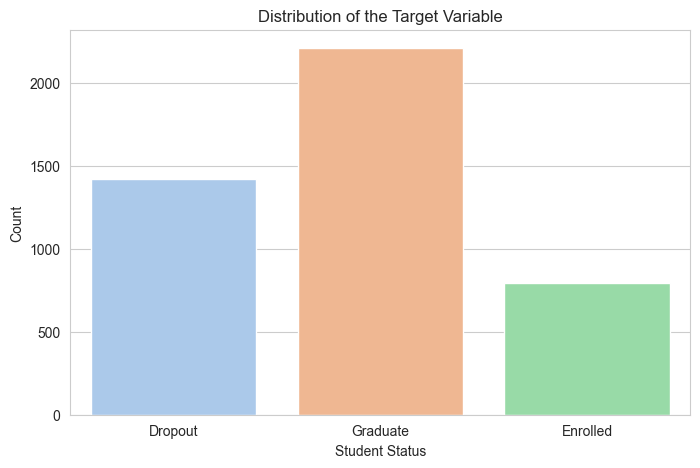

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Target", data=df, palette="pastel")
plt.title("Distribution of the Target Variable")
plt.xlabel("Student Status")
plt.ylabel("Count")
plt.show()

Dropout rates seem to be highly associated with Previous Qualification Grade, Scholarship Holder status and Gender.


# Visualizing dropout rates across different study programs

In [ ]:
# Create a new variable "Course2" with readable course names
df['Course2'] = df['Course'].replace({
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
})


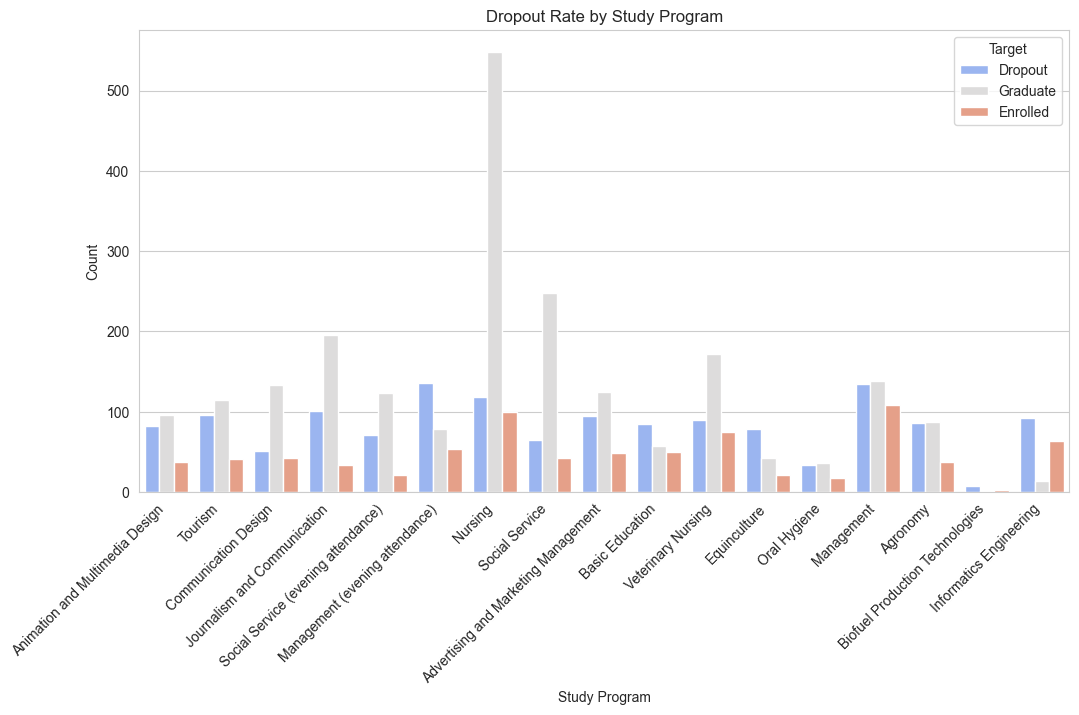

In [ ]:
# Visualization using the new "Course2" variable
plt.figure(figsize=(12, 6))
sns.countplot(x="Course2", hue="Target", data=df, palette="coolwarm")
plt.title("Dropout Rate by Study Program")
plt.xlabel("Study Program")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

# Boxplot to compare admission grades across student statuses

/var/folders/2t/48g1hgqx30s07cfsvjg95f4w0000gn/T/ipykernel_21124/871766737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Target", y="Admission grade", data=df, palette="Set2")


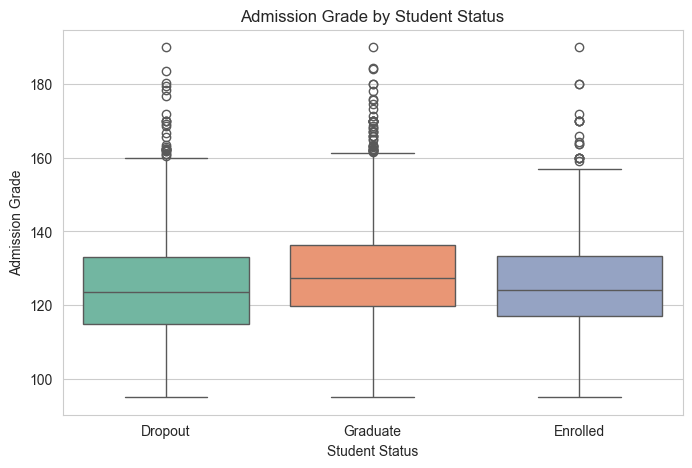

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Target", y="Admission grade", data=df, palette="Set2")
plt.title("Admission Grade by Student Status")
plt.xlabel("Student Status")
plt.ylabel("Admission Grade")
plt.show()

/var/folders/2t/48g1hgqx30s07cfsvjg95f4w0000gn/T/ipykernel_21124/1710389761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Target", y="Admission grade", data=df, palette="muted")


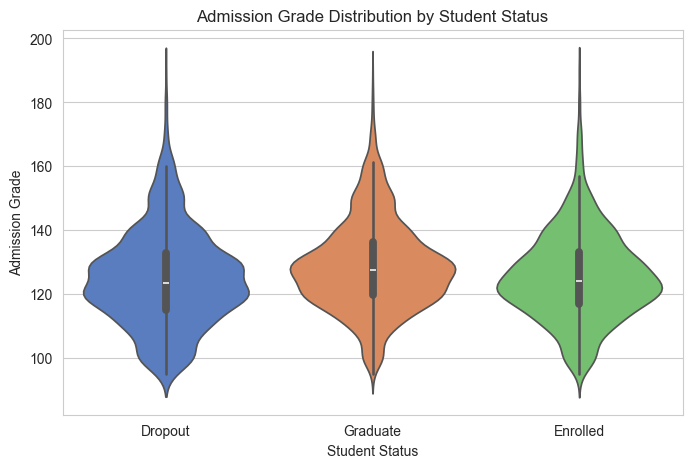

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Target", y="Admission grade", data=df, palette="muted")
plt.title("Admission Grade Distribution by Student Status")
plt.xlabel("Student Status")
plt.ylabel("Admission Grade")
plt.show()

# Comparing dropout rates among scholarship holders and non-holders

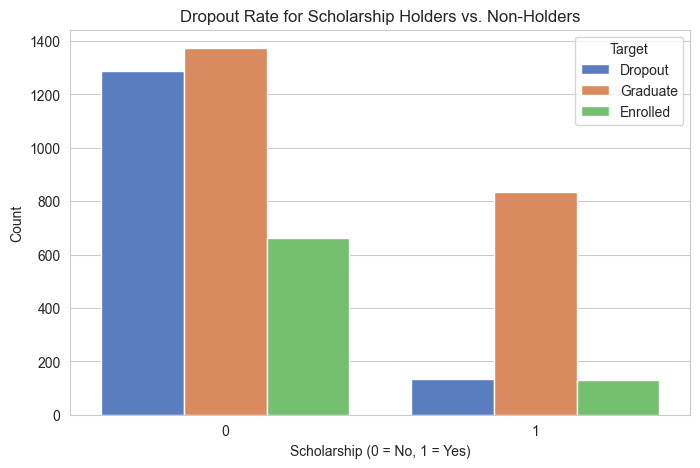

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Scholarship holder", hue="Target", data=df, palette="muted")
plt.title("Dropout Rate for Scholarship Holders vs. Non-Holders")
plt.xlabel("Scholarship (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

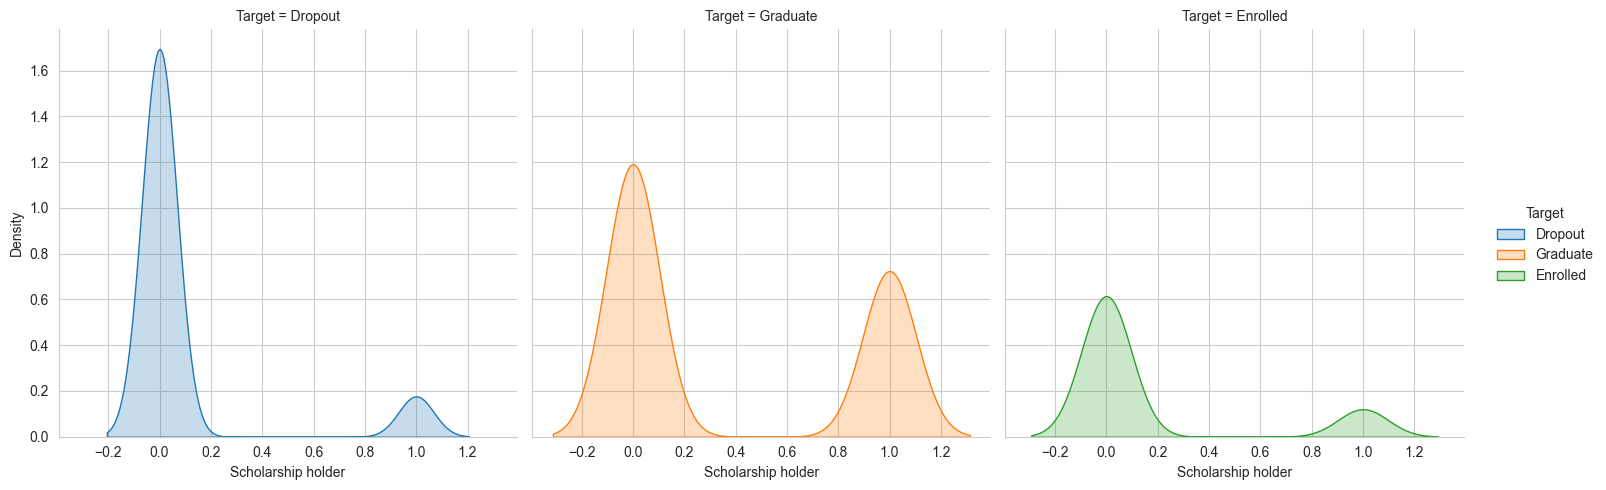

In [ ]:
_ = sns.displot(df, x="Scholarship holder", hue="Target", col="Target",
                kind="kde", fill=True)

# Comparing dropout rates among gender

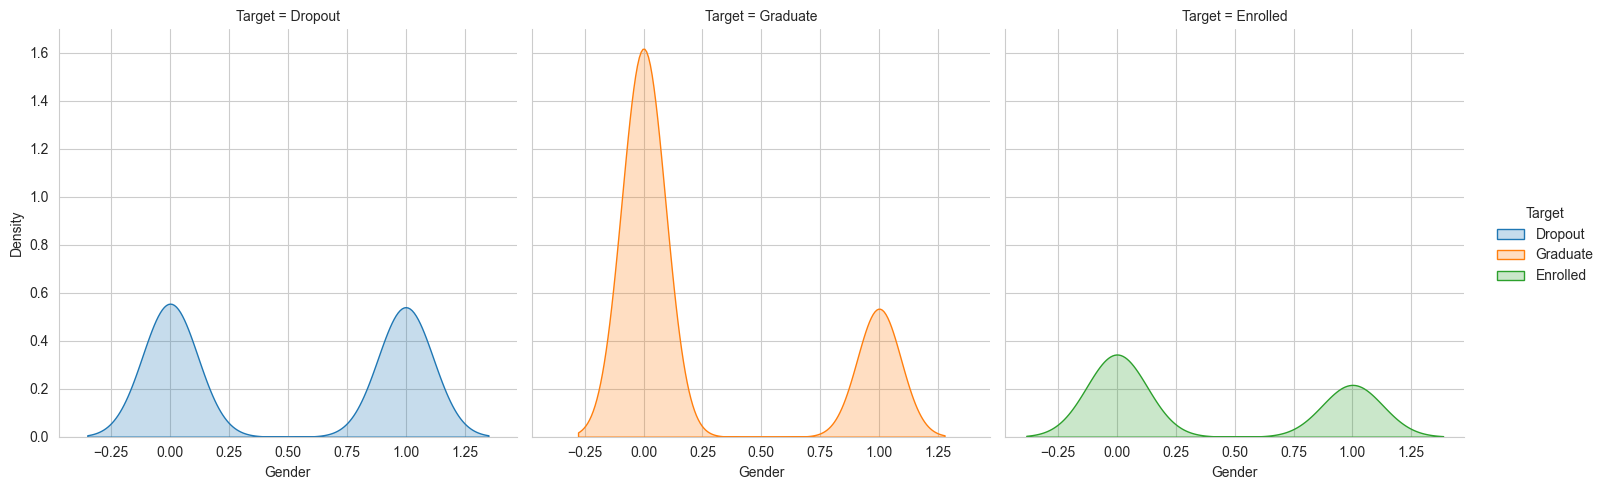

In [ ]:
_ = sns.displot(df, x="Gender", hue="Target", col="Target",
                kind="kde", fill=True)

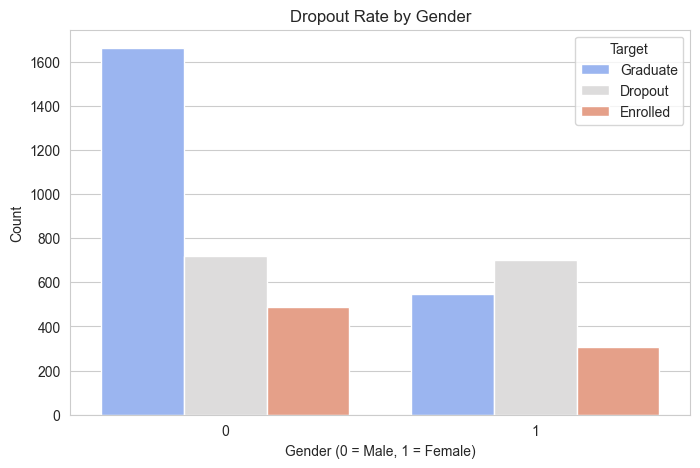

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", hue="Target", data=df, palette="coolwarm")
plt.title("Dropout Rate by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.show()

# Distribution of age at enrollment

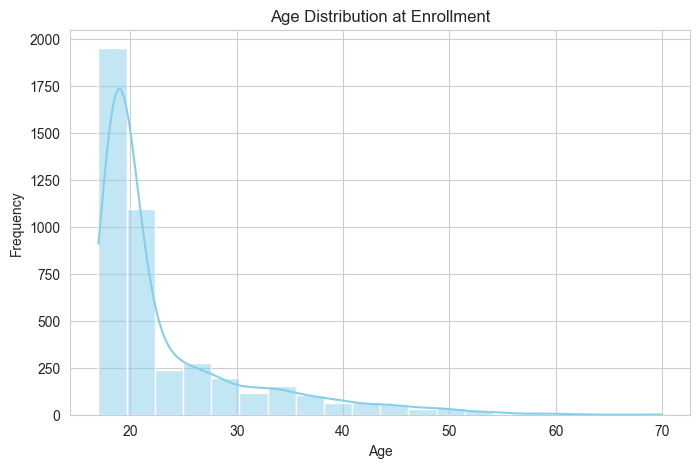

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age at enrollment"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution at Enrollment")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Comparing Parents Education with Dropout Rate

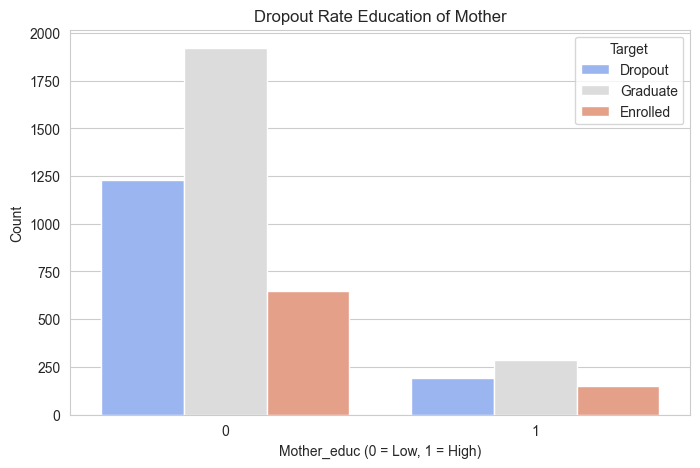

In [ ]:
df.rename(columns={"Mother's qualification": "Mother_qual"}, inplace=True)

df['Mother_educ'] = df['Mother_qual'].apply(lambda x: 1 if x in {2, 3, 4, 5, 6, 39, 40, 41, 42, 43, 44} else 0) #high = 1, low = 0

plt.figure(figsize=(8, 5))
sns.countplot(x="Mother_educ", hue="Target", data=df, palette="coolwarm")
plt.title("Dropout Rate Education of Mother")
plt.xlabel("Mother_educ (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

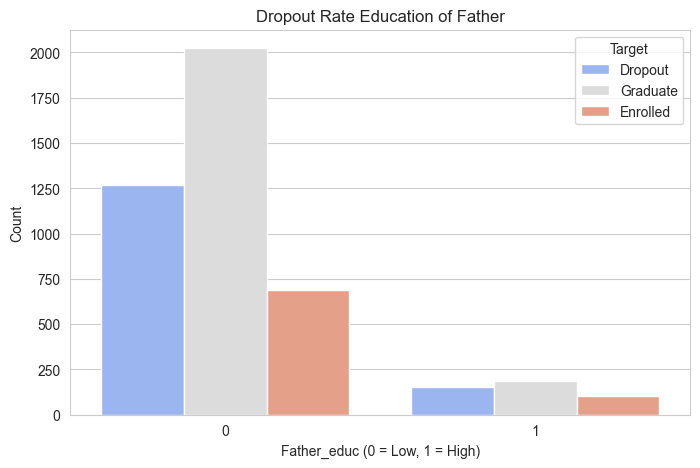

In [ ]:
df.rename(columns={"Father's qualification": "Father_qual"}, inplace=True)

df['Father_educ'] = df['Father_qual'].apply(lambda x: 1 if x in {2, 3, 4, 5, 6, 39, 40, 41, 42, 43, 44} else 0) #high = 1, low = 0

plt.figure(figsize=(8, 5))
sns.countplot(x="Father_educ", hue="Target", data=df, palette="coolwarm")
plt.title("Dropout Rate Education of Father")
plt.xlabel("Father_educ (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

# Comparing Parents Occupation with Dropout Rate

In [ ]:
df['Mother_occ_category'] = df['Mother\'s occupation'].replace({
    0: "Student",
    1: "Executives & Managers",
    2: "Intellectual & Scientific Specialists",
    3: "Technicians & Intermediate Professions",
    4: "Administrative Staff",
    5: "Personal Services & Sales",
    6: "Agriculture & Fisheries",
    7: "Industry & Construction Workers",
    8: "Machine Operators & Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces",
    90: "Other Situation",
    99: "Unknown",
    122: "Health Professionals",
    123: "Teachers",
    125: "ICT Specialists",
    131: "Science & Engineering Technicians",
    132: "Health Technicians",
    134: "Legal & Social Services Technicians",
    141: "Office & Secretarial Staff",
    143: "Accounting & Financial Services",
    144: "Other Administrative Support",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers",
    171: "Construction Workers",
    173: "Precision, Jewelry & Artisan Workers",
    175: "Food, Wood, Clothing & Crafts",
    191: "Cleaning Workers",
    192: "Unskilled Agriculture & Fisheries Workers",
    193: "Unskilled Industry & Transport Workers",
    194: "Meal Preparation Assistants"
})

df['Father_occ_category'] = df['Father\'s occupation'].replace({
    0: "Student",
    1: "Executives & Managers",
    2: "Intellectual & Scientific Specialists",
    3: "Technicians & Intermediate Professions",
    4: "Administrative Staff",
    5: "Personal Services & Sales",
    6: "Agriculture & Fisheries",
    7: "Industry & Construction Workers",
    8: "Machine Operators & Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces",
    90: "Other Situation",
    99: "Unknown",
    122: "Health Professionals",
    123: "Teachers",
    125: "ICT Specialists",
    131: "Science & Engineering Technicians",
    132: "Health Technicians",
    134: "Legal & Social Services Technicians",
    141: "Office & Secretarial Staff",
    143: "Accounting & Financial Services",
    144: "Other Administrative Support",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers",
    171: "Construction Workers",
    173: "Precision, Jewelry & Artisan Workers",
    175: "Food, Wood, Clothing & Crafts",
    191: "Cleaning Workers",
    192: "Unskilled Agriculture & Fisheries Workers",
    193: "Unskilled Industry & Transport Workers",
    194: "Meal Preparation Assistants"
})


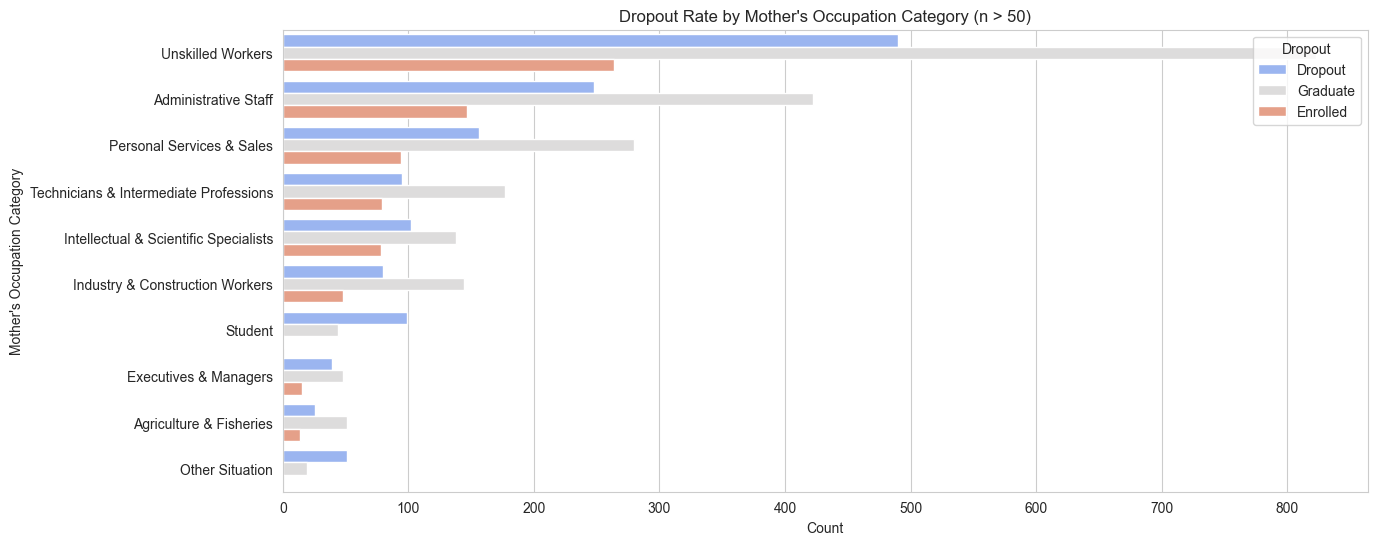

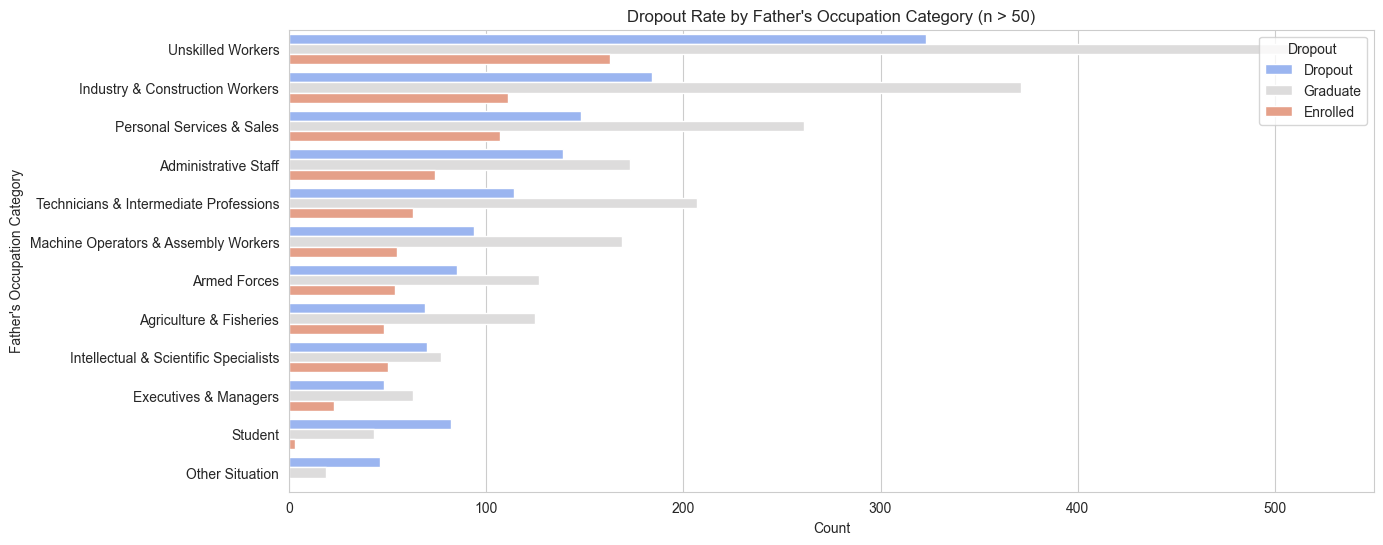

In [ ]:
occupation_counts = df['Mother_occ_category'].value_counts()
valid_categories = occupation_counts[occupation_counts > 50].index
df_filtered = df[df['Mother_occ_category'].isin(valid_categories)]

plt.figure(figsize=(14, 6))
sns.countplot(y="Mother_occ_category", hue="Target", data=df_filtered, palette="coolwarm", order=valid_categories)
plt.title("Dropout Rate by Mother's Occupation Category (n > 50)")
plt.xlabel("Count")
plt.ylabel("Mother's Occupation Category")
plt.legend(title="Dropout", loc="upper right")
plt.show()

occupation_counts = df['Father_occ_category'].value_counts()
valid_categories = occupation_counts[occupation_counts > 50].index
df_filtered = df[df['Father_occ_category'].isin(valid_categories)]

plt.figure(figsize=(14, 6))
sns.countplot(y="Father_occ_category", hue="Target", data=df_filtered, palette="coolwarm", order=valid_categories)
plt.title("Dropout Rate by Father's Occupation Category (n > 50)")
plt.xlabel("Count")
plt.ylabel("Father's Occupation Category")
plt.legend(title="Dropout", loc="upper right")
plt.show()


# Comparing First and Seccond Semester Grades with Dropout

/var/folders/2t/48g1hgqx30s07cfsvjg95f4w0000gn/T/ipykernel_21124/4284316032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Target", y="Curricular units 1st sem (grade)", data=df, palette="coolwarm")


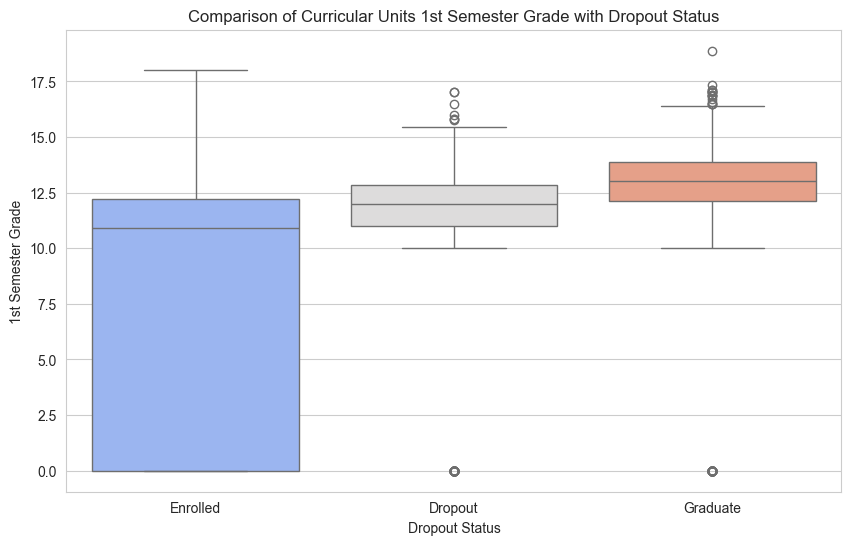

/var/folders/2t/48g1hgqx30s07cfsvjg95f4w0000gn/T/ipykernel_21124/4284316032.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Target", y="Curricular units 2nd sem (grade)", data=df, palette="coolwarm")


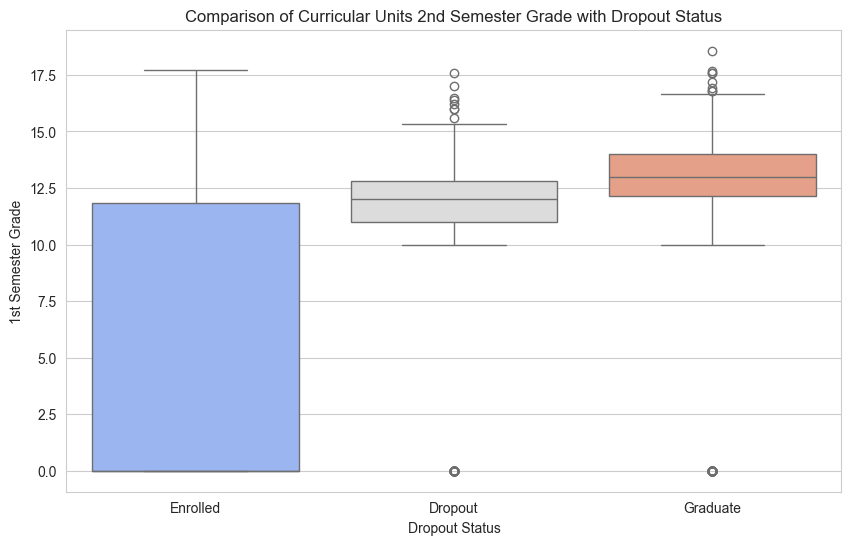

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Target", y="Curricular units 1st sem (grade)", data=df, palette="coolwarm")
plt.title("Comparison of Curricular Units 1st Semester Grade with Dropout Status")
plt.xlabel("Dropout Status")
plt.ylabel("1st Semester Grade")
plt.xticks([0, 1, 2], ["Enrolled", "Dropout", "Graduate"])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Target", y="Curricular units 2nd sem (grade)", data=df, palette="coolwarm")
plt.title("Comparison of Curricular Units 2nd Semester Grade with Dropout Status")
plt.xlabel("Dropout Status")
plt.ylabel("1st Semester Grade")
plt.xticks([0, 1, 2], ["Enrolled", "Dropout", "Graduate"])
plt.show()

# Correlation heatmap of selected numerical features

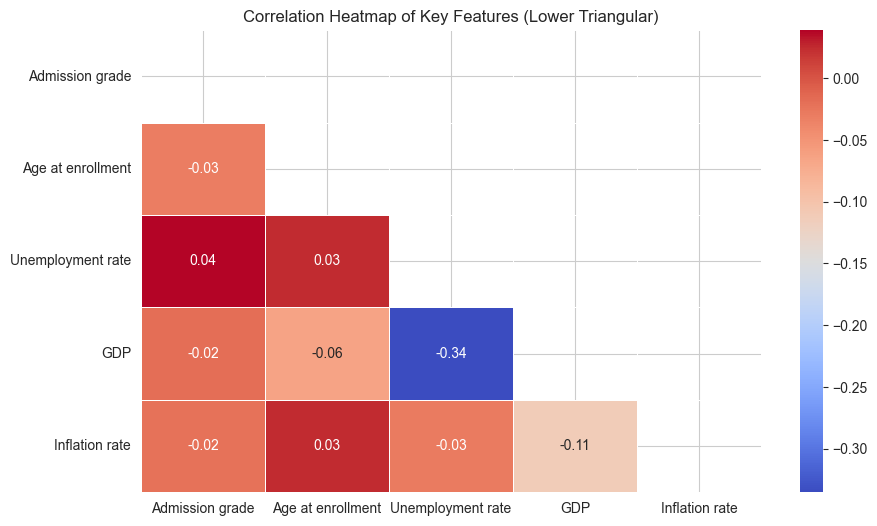

In [ ]:
# Ensure Inflation and Dropout are included in the heatmap if they exist in the dataframe
selected_features = ["Admission grade", "Previous qualification grade", "Age at enrollment", 
                     "Unemployment rate", "GDP", "Inflation rate"]

existing_features = [feature for feature in selected_features if feature in df.columns]

# Compute the correlation matrix
corr_matrix = df[existing_features].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate the correlation heatmap with the mask applied
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Features (Lower Triangular)")
plt.show()
